In [62]:
import warnings
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.network import BayesianNetwork

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import pickle

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

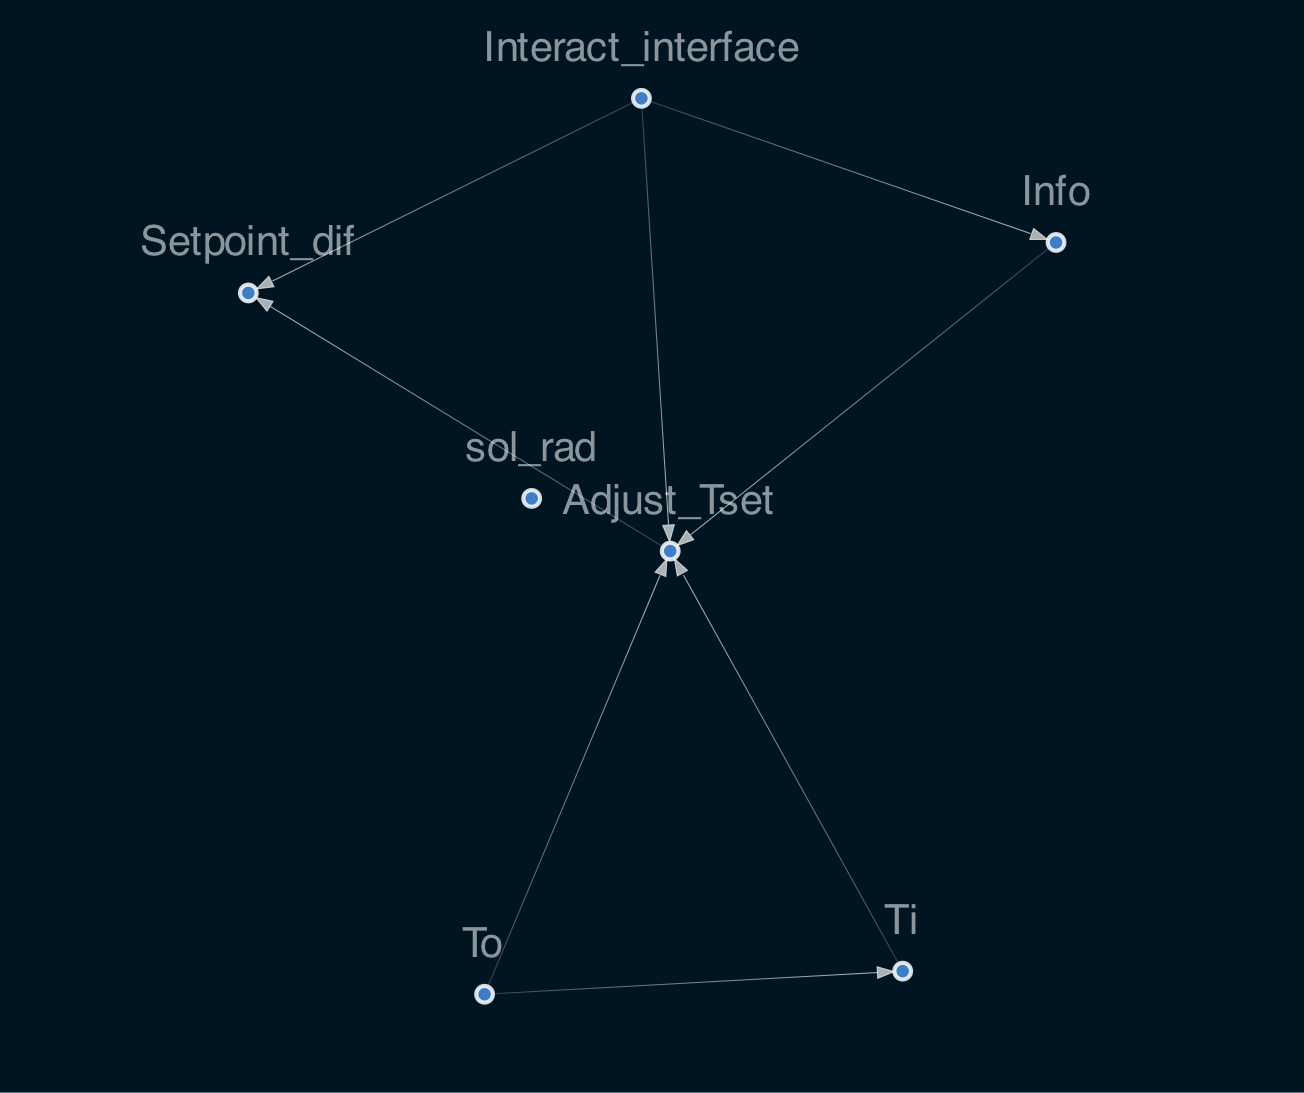

In [79]:
#data = pd.read_csv('toy_dataset2.csv')
data = pd.read_excel('toy_dataset2.xlsx', sheet_name='toy_dataset')
data = data[1000:2000]

non_usable_columns = ['Date/Time','time', 'To-Ti','TC','See_interface_prob','Info_provide','Info_prob','Tset-T1','Tset_prev','Tset_1','Tset_update']
data = data.drop(non_usable_columns, axis = 1)

# Incorporate our domain knowledge
tabu_child_domain = ["To", "sol_rad"] # Outdoor air temp and solar radiation is not affected by the other nodes. 
tabu_parent_domain = ["Setpoint_dif"] # How much would set point temperature be changed will not affect the other nodes.

# From our domain knowledges, we can block "Direct" paths from A to B 
tabu_edges_domain = [("Interact_interface","Ti"),  ("Interact_interface","Ti"), # 
                    ("Adjust_Tset","Interact_interface"), ("Adjust_Tset","Info"), ("Adjust_Tset","Ti"), 
                    ("Info","Ti"), 
                    ("Ti","Info"),
                    ("To","Info"),("To","Setpoint_dif"),
                    ("sol_rad","Adjust_Tset"),("sol_rad","Interact_interface"),("sol_rad","Info"),("sol_rad","Setpoint_dif"),
                    ("Info","Setpoint_dif"), ("Info","Interact_interface")]

sm = from_pandas(data, w_threshold=0.06,
                tabu_edges= tabu_edges_domain,
                tabu_parent_nodes = tabu_parent_domain,
                tabu_child_nodes=tabu_child_domain) # it was recommended that data should be less than 1000

viz = plot_structure(
    sm,
    graph_attributes={"scale": "1.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

In [51]:
#data = pd.read_csv('toy_dataset2.csv')
data = pd.read_excel('toy_dataset2.xlsx', sheet_name='value2')
data = data[0:1001]

# over 1000 timesteps ~ only 161 actions were done.
# only 67 times eco-feedback was provided. 

non_usable_columns = ['Date/Time','time', 'To-Ti','TC','See_interface_prob','Info_provide','Info_prob','Tset-T1','Tset_prev','Tset_1','Tset_update']
data = data.drop(non_usable_columns, axis = 1)

data.head()

,sol_rad,To,Ti,Interact_interface,Info,Adjust_Tset,Setpoint_dif
0,0.0,19.75,26.000000,0,0,0,0
1,0.0,19.50,25.937500,0,0,0,0
2,0.0,19.25,25.873125,0,0,0,0
3,0.0,19.00,25.806894,0,0,0,0
4,0.0,18.75,25.738825,0,0,0,0


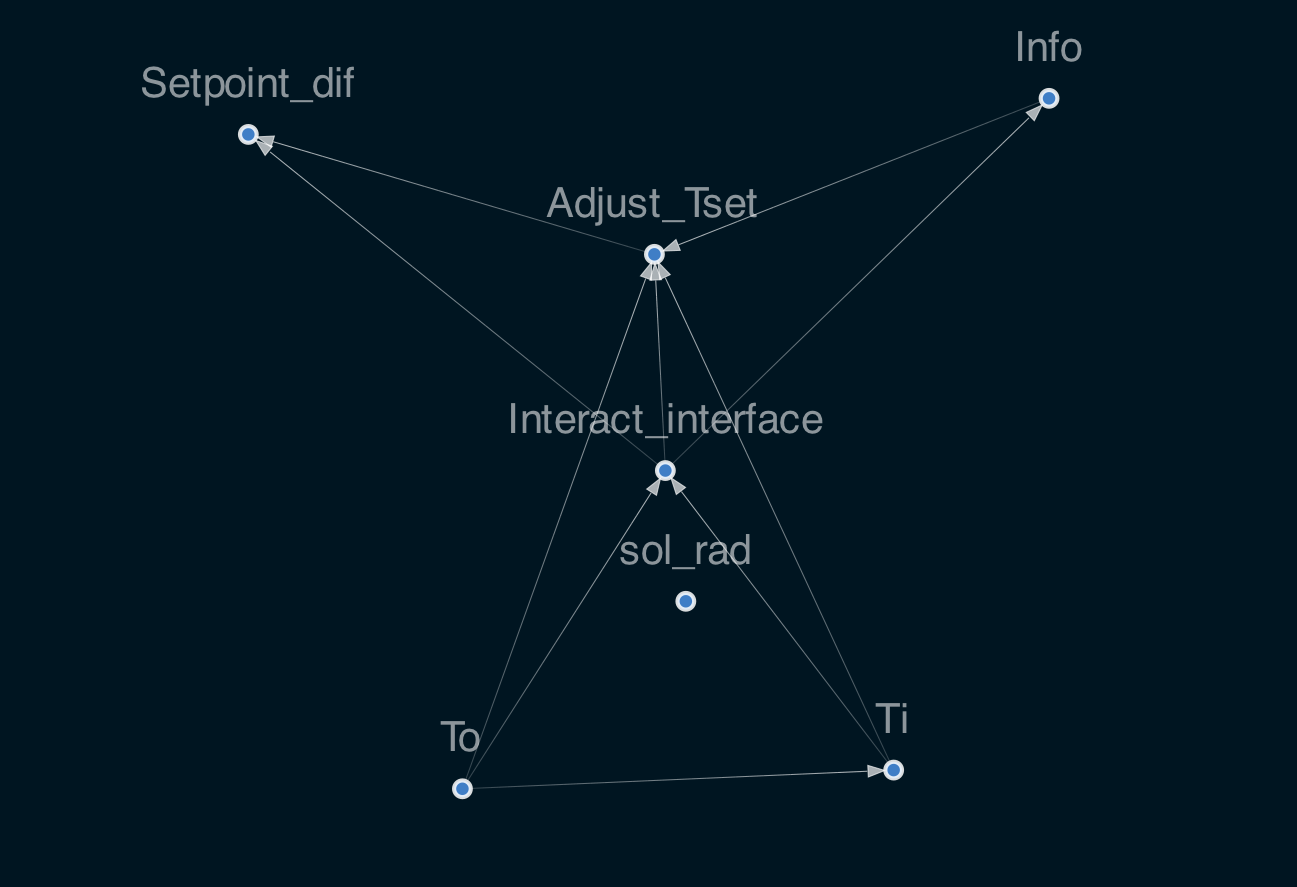

In [75]:
tabu_child_domain = ["To", "sol_rad"]
tabu_parent_domain = ["Setpoint_dif"]
tabu_edges_domain = [("Interact_interface","Ti"),  ("Interact_interface","Ti"), # 
                    ("Adjust_Tset","Interact_interface"), ("Adjust_Tset","Info"), ("Adjust_Tset","Ti"), 
                    ("Info","Ti"), 
                    ("Ti","Info"),
                    ("To","Info"),("To","Setpoint_dif"),
                    ("sol_rad","Adjust_Tset"),("sol_rad","Interact_interface"),("sol_rad","Info"),("sol_rad","Setpoint_dif"),
                    ("Info","Setpoint_dif"), ("Info","Interact_interface")]

sm = from_pandas(data, w_threshold=0.05,
                tabu_edges= tabu_edges_domain,
                tabu_parent_nodes = tabu_parent_domain,
                tabu_child_nodes=tabu_child_domain) # it was recommended that data should be less than 1000
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

When we don't give any threshold : all possible causal paths

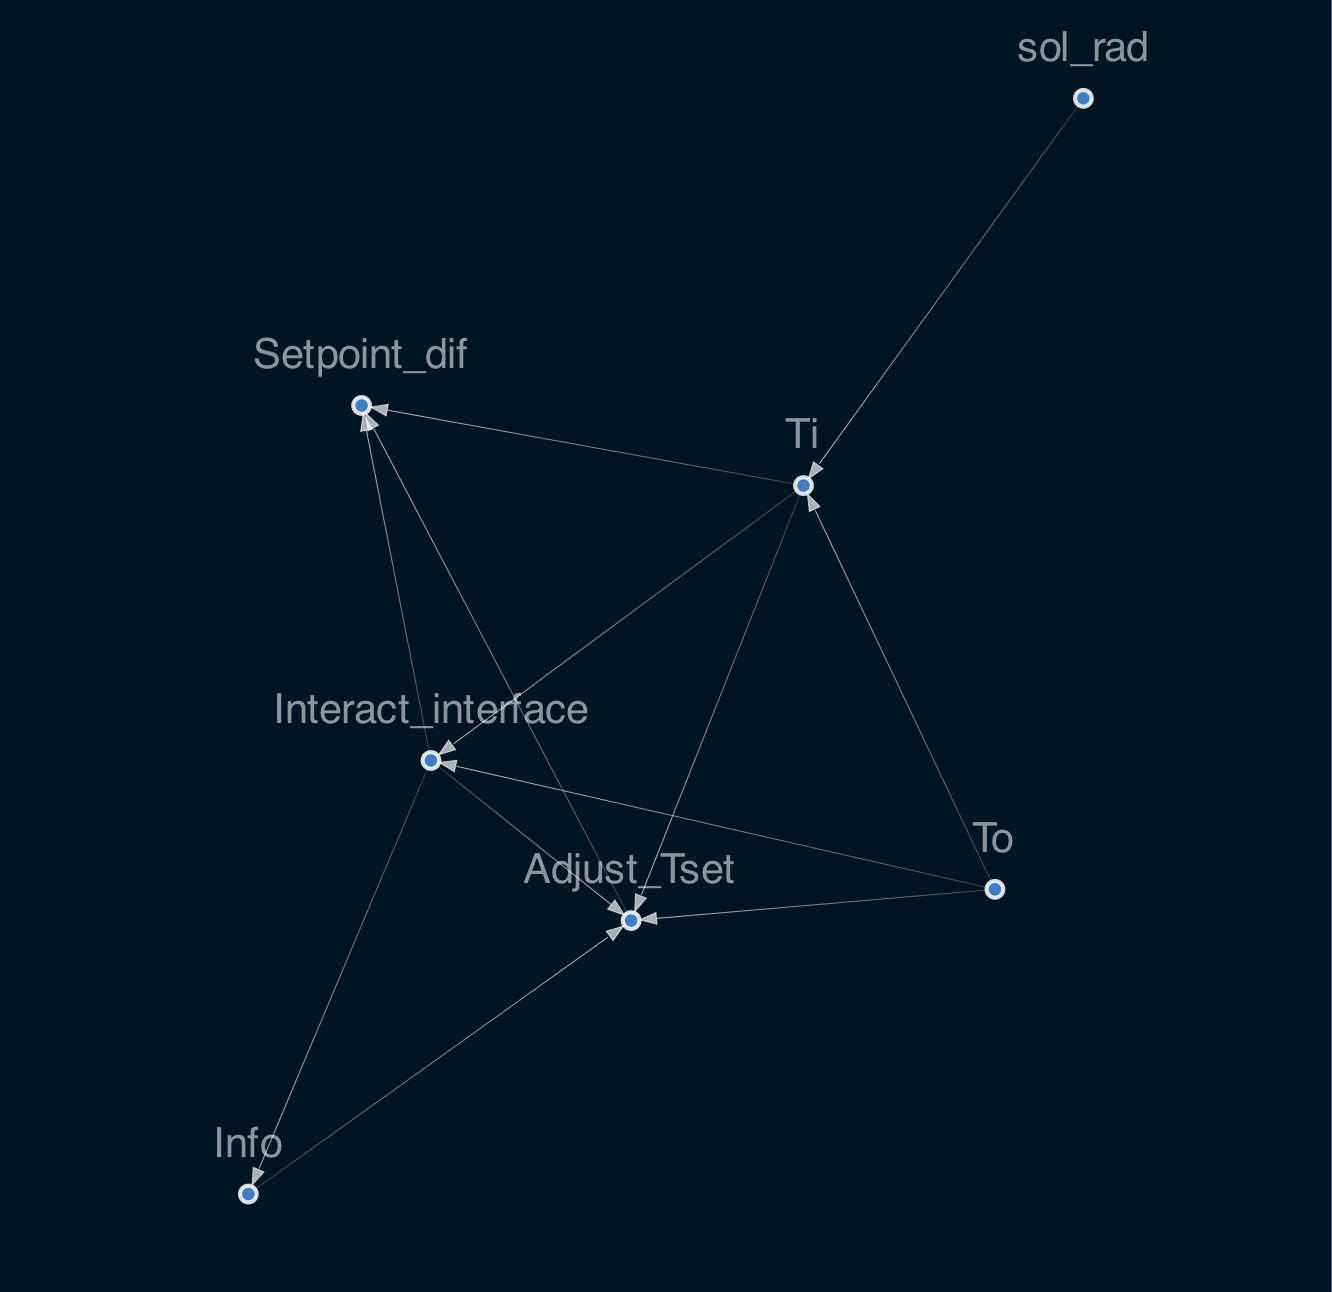

In [76]:
sm = from_pandas(data, #w_threshold=0.05,
                tabu_edges= tabu_edges_domain,
                tabu_parent_nodes = tabu_parent_domain,
                tabu_child_nodes=tabu_child_domain) # it was recommended that data should be less than 1000
viz = plot_structure(
    sm,
    graph_attributes={"scale": "1.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))